# Analysis of Westbound Traffic on I-94

Hey! Welcome to my project on a dataset on Westbound Traffic on the I-94 Interstate highway. This project will focus on *exploratory* data visualization. My goal is to demonstrate the power of exploratory data visualization, and it's heavy influence on *explanatory* data viz. As always, let's begin by setting up our project!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

interstate = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Info Breakdown

Our dataset contains 48,204 rows and a total of 9 columns. 5 of these columns contain numerical data, while the remaining 4 are of the object type.

## Project Goal

Our goal with this project is to determine indicators of heavy traffic on the I-94. The documentation of this dataset mentions that the records are ***only on westbound traffic***, and the station in which the data was created is located about halfway between Minneapolis and Saint Paul.

In [2]:
interstate.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
interstate.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


### Let's start utilizing some histograms to begin our journey with exploratory data visualizations.

Histograms are great because they can tell us much about the frequency of certain variables. We will begin with the `traffic_volume` column.

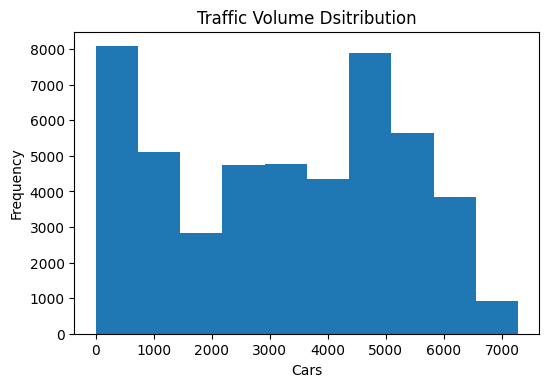

In [4]:
traffic = interstate['traffic_volume']
traffic.plot.hist()
plt.xlabel('Cars')
plt.title('Traffic Volume Dsitribution')
plt.show()

In [5]:
traffic.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### What can we take from this?

Our histogram is showing us a few things:
- While there are times where the traffic volume hits the high end of 7000+, it's not the norm.
- There is a strong jump in frequency at ~5000; this tells me that there may be a correlation between other variables and that range
- That jump is shown in our `.describe()` of the `traffic` variable. The 75th percentile is 4933 - that is, most of our data can be said to inhabit at or below that range.
- We also see a jump in frequency in the 0 through 1,000 traffic volume range; again, a possible correlation with other variables.

### What could that correlation possibly be?

Many things! 

- Time of Day
- Day of the week
- Weather

### Let's begin finding these patterns!

What we want to do first is start to create distincitions between our times. Let's split our times into two categories: Daytime data (7am to 7pm) and Nighttime data (7pm - 7am). While it's not perfect, it's a good start.

Before any of that can be possible, we should first convert our `date_time` column to a `datetime` type, and then isolate those times.

In [6]:
interstate['date_time'] = pd.to_datetime(interstate['date_time'])
time = interstate['date_time']

In [7]:
interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [8]:
daytime = interstate[(time.dt.hour >= 7) & (time.dt.hour < 19)].copy()
nighttime = interstate[(time.dt.hour >= 19) | (time.dt.hour < 7)].copy()

In [9]:
daytime.shape[0]

23877

In [10]:
nighttime.shape[0]

24327

In [11]:
# Ensuring we did not lose any rows during our boolean indexing.
# The result is 48,204 - the exact same as our .info of the main df
daytime.shape[0] + nighttime.shape[0]

48204

### In the above code, we used boolean indexing to isolate the dataframe by the time ranges we specified previously.

Let's take a look at the new dfs!

In [12]:
daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [13]:
nighttime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


### Next, let's plot some side-by-side histograms of our newly curated dataframes.

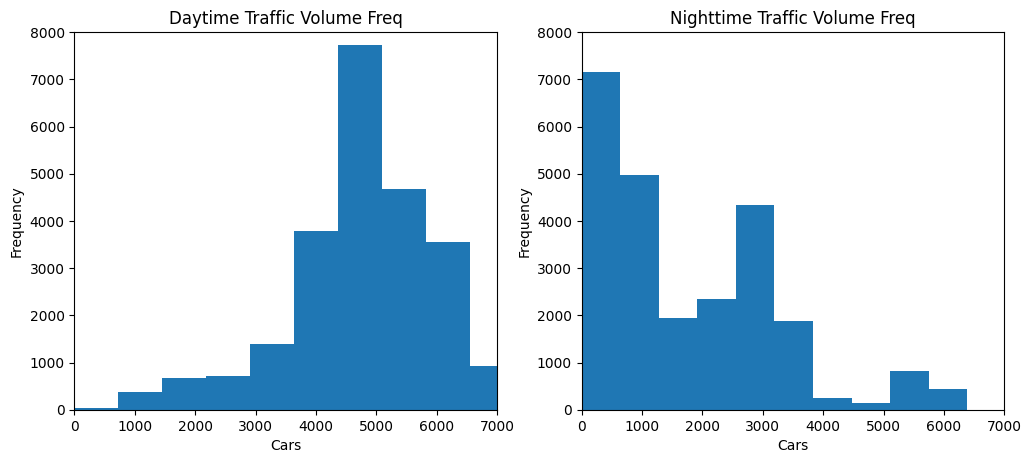

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume Freq')
plt.xlabel('Cars')
plt.ylabel('Frequency')
plt.xlim(0,7000)
plt.ylim(0,8000)

plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic Volume Freq')
plt.xlabel('Cars')
plt.ylabel('Frequency')
plt.xlim(0,7000)
plt.ylim(0,8000)

plt.show()



### The histograms have spoken

It looks like daytime has a higher frequency of heavy traffic than it's nighttime counterpart!

In the code above, we set up our graphs to 'walk on the same lines' in order to conduct a fair assessment of their similarities and differences. The daytime graph seems to be *left skewed*, while the nighttime graph looks more *right skewed*, meaning that our daytime data reflects a heavier concentration of traffic overrall. So, does this mean we're done? ***Absolutely not!***

### Let's do a quick `.describe()` on our datasets and see what we can gauge from it

In [15]:
daytime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [16]:
nighttime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


### When we look at our breakdowns, the mean traffic volume for the daytime data blows the mean nighttime data out of the water. So let's focus on the daytime data since we are looking for heavy traffic indicators.

We can begin to get granular now to find some more patterns. Maybe there is a correlation between the month and the traffic volume. Let's find out by collecting our daytime data by month, then plotting a line graph.

In [17]:
daytime['month'] = time.dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

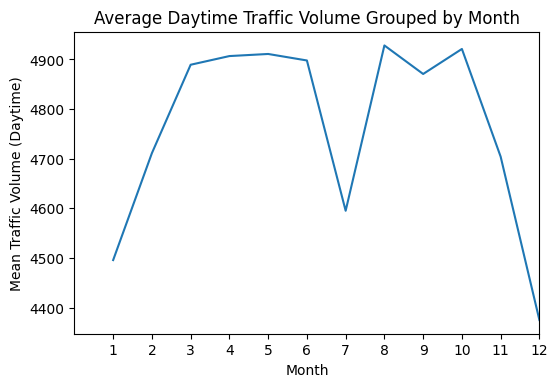

In [18]:
by_month['traffic_volume'].plot()
plt.ylabel('Mean Traffic Volume (Daytime)')
plt.xlabel('Month')
plt.title('Average Daytime Traffic Volume Grouped by Month')
plt.xlim(0,12)
plt.xticks(np.arange(1,13))
plt.show()

### Taking a look at our line plot, we can see some interesting patterns

Traffic volumes rise during January and February before maxing and plateauing from March until June. Then something interesting happens: we see a sharp decline in traffic in July. It then spikes from August through October, where it then begins a decline into the winter months of November and December.

### Let's get even more granular by looking at patterns for days of the week instead.

In [19]:
daytime['day_of_week'] = time.dt.dayofweek
by_day_of_week = daytime.groupby('day_of_week').mean()

# Looking at the series, 0 is Monday and 6 is Sunday

by_day_of_week['traffic_volume']

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

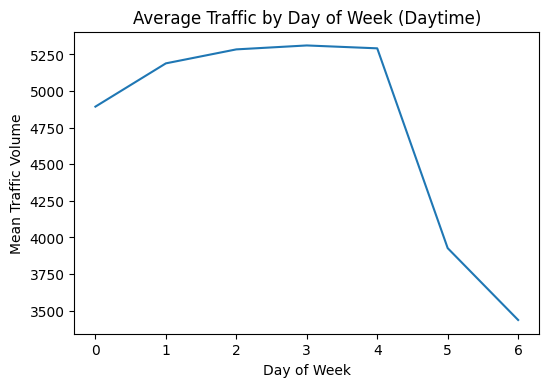

In [20]:
by_day_of_week['traffic_volume'].plot()
plt.ylabel('Mean Traffic Volume')
plt.xlabel('Day of Week')
plt.title('Average Traffic by Day of Week (Daytime)')
plt.show()

### Traffic is much heavier during the weekdays, and dies down toward the weekend.

If we want to get more specific, we can! Next, we will split the dataset even further by filtering the weekdays from the weekend (since we are focusing on heavy traffic indicators), then grouping the weekdays by time of day to see if there are any patterns there.

In [21]:
daytime['hour'] = time.dt.hour

business_days = daytime[daytime['day_of_week'] <= 4].copy()

weekend = daytime[daytime['day_of_week'] >= 5].copy()

by_hour_business = business_days.groupby('hour').mean()

by_hour_weekend = weekend.groupby('hour').mean()

In [22]:
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


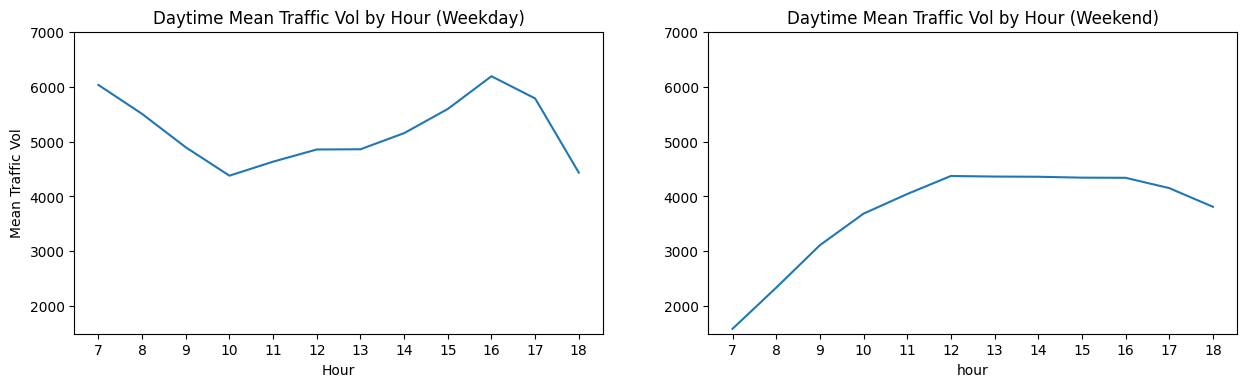

In [23]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot()
plt.xticks(np.arange(7,19))
plt.ylim(1500,7000)
plt.xlabel('Hour')
plt.ylabel('Mean Traffic Vol')
plt.title('Daytime Mean Traffic Vol by Hour (Weekday)')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot()
plt.xticks(np.arange(7,19))
plt.ylim(1500,7000)
plt.title('Daytime Mean Traffic Vol by Hour (Weekend)')
plt.show()

### Comparing Weekday traffic to Weekend traffic shows us more!

The weekday traffic volume is *much* heavier than the weekend traffic. As we narrow our dataset further and further, we begin to uncover certain conditions that lead to heavier traffic.

During the weekday, it seems that 7am sees heavy traffic. Could this correlate to people driving to work? We see another spike at around 4pm - maybe the workforce going home?

### There is more to this than time of day! 

Let's find some correlation between some of our other columns, like `temp`, `rain_1h`, `clouds_all`, etc.

In [24]:
daytime[['traffic_volume','rain_1h','snow_1h','clouds_all']].corr()

,traffic_volume,rain_1h,snow_1h,clouds_all
traffic_volume,1.000000,0.003697,0.001265,-0.032932
rain_1h,0.003697,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.000091,1.000000,0.027721
clouds_all,-0.032932,0.004993,0.027721,1.000000


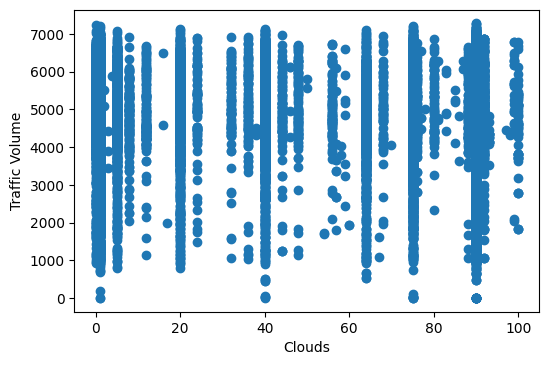

In [25]:
plt.scatter(daytime['clouds_all'],daytime['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Clouds')
plt.show()

### The numerical weather patterns don't seem to have much, if any, correlation to the traffic.

We still have our categorical weather patterns, however. Let's analyze those and see if we get any results!

In [29]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_desc = daytime.groupby('weather_description').mean()

print(by_weather_main['traffic_volume'].head())
print(by_weather_desc['traffic_volume'].head())

weather_main
Clear      4778.416260
Clouds     4865.415996
Drizzle    4837.212911
Fog        4372.491713
Haze       4609.893285
Name: traffic_volume, dtype: float64
weather_description
SQUALLS          4211.000000
Sky is Clear     4919.009390
broken clouds    4824.130326
drizzle          4737.330935
few clouds       4839.818023
Name: traffic_volume, dtype: float64


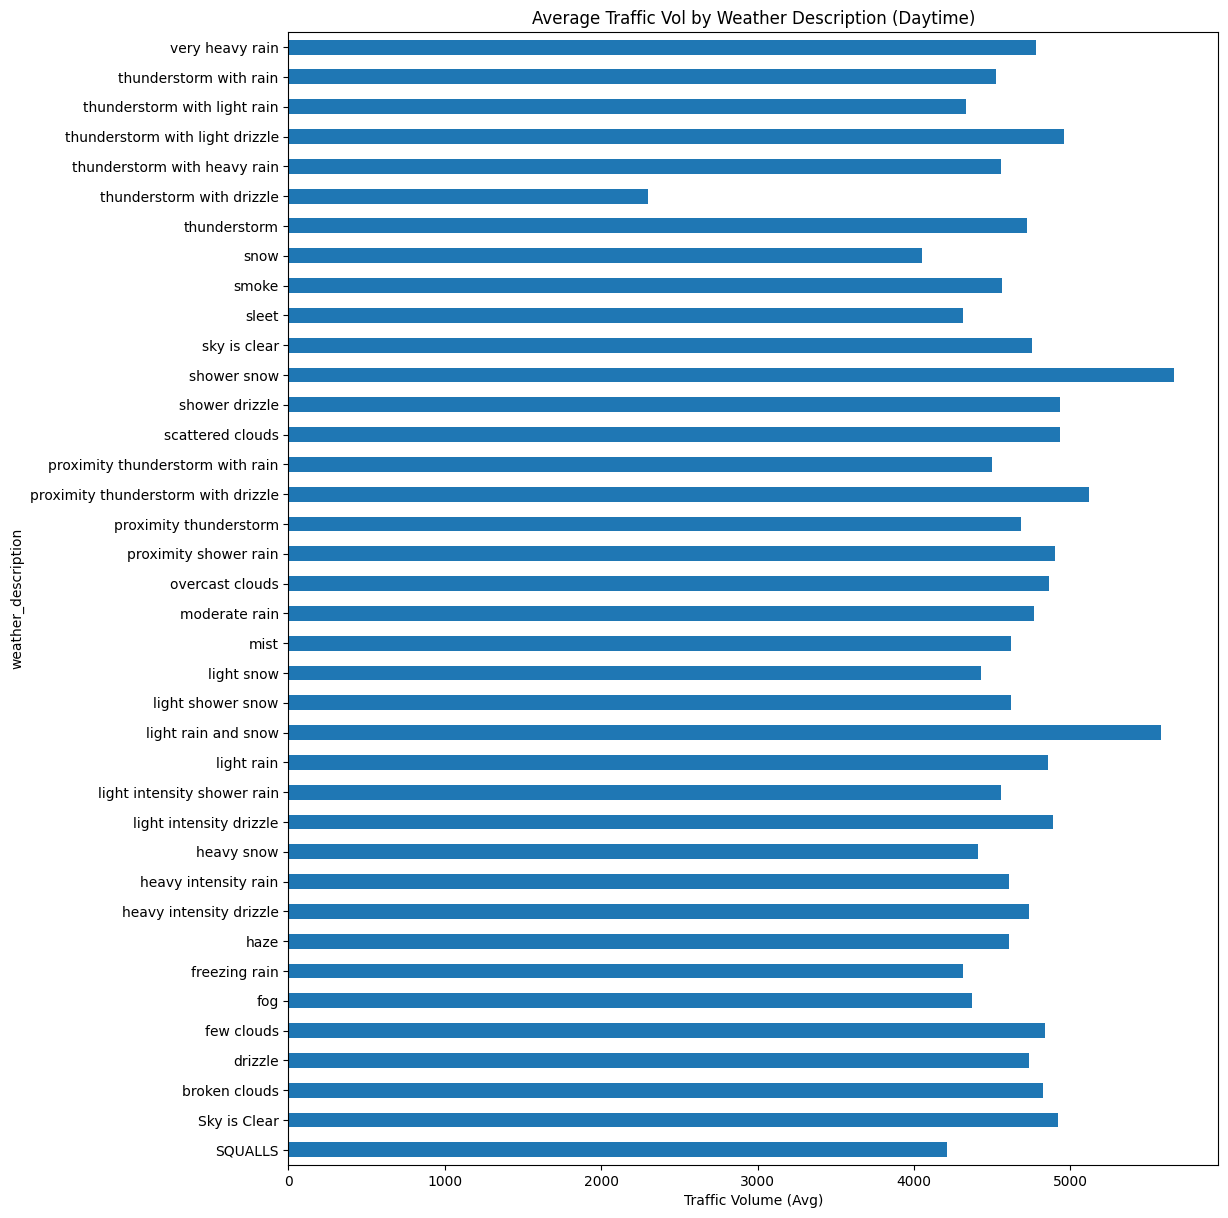

In [38]:
plt.figure(figsize=(12,15))
by_weather_desc['traffic_volume'].plot.barh()
plt.title('Average Traffic Vol by Weather Description (Daytime)')
plt.xlabel('Traffic Volume (Avg)')
plt.show()

### Looking at our horizontal bar plot, we can see some spikes!

It looks like ***light rain and snow*** and ***shower snow*** break the 5000 average traffic volume ticks. ***proximity storm and drizzle*** and ***thunderstorm with light drizzle*** also seem to influence heavier traffic, though not as intensely.

## Through our use of exploratory data visualizations, we were able to narrow down our data in order to come to some educated conclusions on the causes of heavy traffic!

- We learned that traffic is heavier during the weekdays in the daytime, and that snow weather patterns influence the traffic volume moreso than other weather patterns

- Throughout the project, we gained traction thanks to our histograms, line plots, bar charts, and correlation tables

Thanks for sticking with me on this project, and I hope you also gained an appreciation for the power of exploratory data viz! It's where the magic happens!